In [1]:
data <- read.csv("new_chr10_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
145979,chr10_3101000,3100900,3,121,145,72.02381,70.048309
65681,chr10_3101000,3100900,2,42,48,25.00000,23.188406
1,chr10_3101000,3100900,1,5,14,2.97619,6.763285
145980,chr10_3105900,3105800,3,63,70,59.43396,53.846154
65682,chr10_3105900,3105800,2,26,43,24.52830,33.076923
2,chr10_3105900,3105800,1,17,17,16.03774,13.076923
145981,chr10_3107700,3107600,3,47,56,48.45361,39.716312
65683,chr10_3107700,3107600,2,40,65,41.23711,46.099291
3,chr10_3107700,3107600,1,10,20,10.30928,14.184397
145982,chr10_3107800,3107700,3,157,205,74.40758,68.791946


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "aRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "aRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "aRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
34503,chr10_3101000,3100900,121,42,5
34533,chr10_3105900,3105800,63,26,17
34540,chr10_3107700,3107600,47,40,10
34541,chr10_3107800,3107700,157,34,20
34553,chr10_3111500,3111400,8,0,0
34555,chr10_3112000,3111900,4,4,3
34557,chr10_3112600,3112500,61,5,19
34569,chr10_3115100,3115000,6,1,4
34575,chr10_3117500,3117400,153,46,6
34578,chr10_3118100,3118000,245,23,1


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 85933"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
34503,chr10_3101000,3100900,121,42,5,0
34533,chr10_3105900,3105800,63,26,17,4900
34540,chr10_3107700,3107600,47,40,10,1800
34541,chr10_3107800,3107700,157,34,20,100
34553,chr10_3111500,3111400,8,0,0,3700
34555,chr10_3112000,3111900,4,4,3,500
34557,chr10_3112600,3112500,61,5,19,600
34569,chr10_3115100,3115000,6,1,4,2500
34575,chr10_3117500,3117400,153,46,6,2400
34578,chr10_3118100,3118000,245,23,1,600


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
34503,chr10_3101000,3100900,121,42,5,0
34541,chr10_3107800,3107700,157,34,20,100
34709,chr10_3146600,3146500,217,64,5,100
34720,chr10_3148400,3148300,84,33,8,100
34806,chr10_3164700,3164600,112,65,18,100
34881,chr10_3184400,3184300,140,35,6,100


,binID,start,high,medium,low,dist
34541,chr10_3107800,3107700,157,34,20,100
34709,chr10_3146600,3146500,217,64,5,100
34720,chr10_3148400,3148300,84,33,8,100
34806,chr10_3164700,3164600,112,65,18,100
34881,chr10_3184400,3184300,140,35,6,100
34998,chr10_3212200,3212100,50,51,20,100


[1] 12235

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3107600   3107700   3146400   3146500   3148200   3148300   3164500
    [8]   3164600   3184200   3184300   3212000   3212100   3218300   3218400
   [15]   3236300   3236400   3242800   3242900   3243300   3243400   3276000
   [22]   3276100   3276200   3313800   3313900   3316900   3317000   3323000
   [29]   3323100   3364800   3364900   3366300   3366400   3405900   3406000
   [36]   3445700   3445800   3477000   3477100   3477200   3540600   3540700
   [43]   3572800   3572900   3582600   3582700   3603900   3604000   3643600
   [50]   3643700   3644900   3645000   3645100   3666700   3666800   3695600
   [57]   3695700   3696700   3696800   3748100   3748200   3806800   3806900
   [64]   3835800   3835900   3844400   3844500   3885100   3885200   3914500
   [71]   3914600   3920100   3920200   3946500   3946600   3964500   3964600
   [78]   3977000   3977100   3989100   3989200   3989300   3990500   3990600
   [85]   3992700   3992800   3995900   3996000   3996500   3996600   3996900
   [92]   3997000   4000000   4000100   4000200   4001800   4001900   4010000
   [99]   4010100   4028900   4029000   4029100   4029200   4029300   4038900
  [106]   4039000   4041500   4041600   4047800   4047900   4051300   4051400
  [113]   4053800   4053900   4056400   4056500   4059600   4059700   4062500
  [120]   4062600   4085800   4085900   4097800   4097900   4098200   4098300
  [127]   4102800   4102900   4103500   4103600   4113100   4113200   4122500
  [134]   4122600   4129300   4129400   4137100   4137200   4145000   4145100
  [141]   4147800   4147900   4152200   4152300   4159400   4159500   4164900
  [148]   4165000   4188700   4188800   4209200   4209300   4261200   4261300
  [155]   4285700   4285800   4301100   4301200   4333400   4333500   4335000
  [162]   4335100   4335400   4335500   4338800   4338900   4342700   4342800
  [169]   4344500   4344600   4367600   4367700   4368700   4368800   4369100
  [176]   4369200   4373100   4373200   4374800   4374900   4379800   4379900
  [183]   4380000   4380100   4382500   4382600   4384500   4384600   4392000
  [190]   4392100   4404400   4404500   4411100   4411200   4414100   4414200
  [197]   4414300   4427100   4427200   4429000   4429100   4430800   4430900
  [204]   4452800   4452900   4453600   4453700   4470200   4470300   4479200
  [211]   4479300   4479400   4480500   4480600   4482500   4482600   4482800
  [218]   4482900   4513200   4513300   4520200   4520300   4524700   4524800
  [225]   4526700   4526800   4535300   4535400   4536100   4536200   4563300
  [232]   4563400   4600400   4600500   4612600   4612700   4617000   4617100
  [239]   4620900   4621000   4621100   4621200   4654000   4654100   4657600
  [246]   4657700   4657800   4715000   4715100   4734600   4734700   4754300
  [253]   4754400   4756600   4756700   4759900   4760000   4809100   4809200
  [260]   4822100   4822200   4824000   4824100   4837800   4837900   4894600
  [267]   4894700   4911600   4911700   4936000   4936100   4936200   4936700
  [274]   4936800   4940900   4941000   4943200   4943300   4943900   4944000
  [281]   4966300   4966400   4970400   4970500   4971200   4971300   4971400
  [288]   4973700   4973800   4982500   4982600   4990200   4990300   5012600
  [295]   5012700   5043500   5043600   5068700   5068800   5068900   5079900
  [302]   5080000   5081100   5081200   5081700   5081800   5089900   5090000
  [309]   5090100   5108600   5108700   5123600   5123700   5142000   5142100
  [316]   5153900   5154000   5155400   5155500   5160100   5160200   5177800
  [323]   5177900   5182800   5182900   5192900   5193000   5195300   5195400
  [330]   5228500   5228600   5229100   5229200   5249600   5249700   5305700
  [337]   5305800   5316300   5316400   5326000   5326100   5330100   5330200
  [344]   5339300   5339400   5359000   5359100   5367400   5367500   5407200
  [351]   5407300   5424100   5424200   5461700   5461800   5480300   5480400
  [358]   5489800   548990

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
34540,chr10_3107700,3107600,47,40,10
34541,chr10_3107800,3107700,157,34,20
34707,chr10_3146500,3146400,126,5,0
34709,chr10_3146600,3146500,217,64,5
34717,chr10_3148300,3148200,185,54,13
34720,chr10_3148400,3148300,84,33,8
34804,chr10_3164600,3164500,35,34,23
34806,chr10_3164700,3164600,112,65,18
34880,chr10_3184300,3184200,46,39,6
34881,chr10_3184400,3184300,140,35,6


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
34541,chr10_3107800,3107700,5.38812629817514e-06
34707,chr10_3146500,3146400,0
34709,chr10_3146600,3146500,2.90000386580203e-06
34717,chr10_3148300,3148200,0
34720,chr10_3148400,3148300,0.454310372546641
34804,chr10_3164600,3164500,0


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
34720,chr10_3148400,3148300,0.454310372546641
35083,chr10_3236500,3236400,0.388385001188842
35112,chr10_3243500,3243400,0.4137908809287
35242,chr10_3276300,3276200,0.156945874568318
35441,chr10_3323200,3323100,0.48102142602883
35600,chr10_3365000,3364900,0.107999915581105


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3148200   3148300   3236300   3236400   3243300   3243400   3276100
   [8]   3276200   3323000   3323100   3364800   3364900   3477100   3477200
  [15]   3540600   3540700   3643600   3643700   3644900   3645000   3666700
  [22]   3666800   3695600   3695700   3748100   3748200   3835800   3835900
  [29]   3914500   3914600   3920100   3920200   3946500   3946600   3989100
  [36]   3989200   3989300   3992700   3992800   3995900   3996000   3996500
  [43]   3996600   4001800   4001900   4029200   4029300   4041500   4041600
  [50]   4047800   4047900   4051300   4051400   4053800   4053900   4056400
  [57]   4056500   4085800   4085900   4098200   4098300   4103500   4103600
  [64]   4137100   4137200   4147800   4147900   4159400   4159500   4164900
  [71]   4165000   4301100   4301200   4333400   4333500   4335000   4335100
  [78]   4342700   4342800   4344500   4344600   4367600   4367700   4382500
  [85]   4382600   4404400   4404500   4429000   4429100   4453600   4453700
  [92]   4479200   4479300   4482500   4482600   4513200   4513300   4535300
  [99]   4535400   4563300   4563400   4654000   4654100   4657600   4657700
 [106]   4715000   4715100   4756600   4756700   4809100   4809200   4824000
 [113]   4824100   4837800   4837900   4894600   4894700   4911600   4911700
 [120]   4936000   4936100   4936200   4936700   4936800   4943900   4944000
 [127]   4971300   4971400   5043500   5043600   5068800   5068900   5081100
 [134]   5081200   5081700   5081800   5089900   5090000   5090100   5108600
 [141]   5108700   5155400   5155500   5160100   5160200   5195300   5195400
 [148]   5330100   5330200   5339300   5339400   5424100   5424200   5491300
 [155]   5491400   5539500   5539600   5539700   5580200   5580300   5603800
 [162]   5603900   5604000   5653100   5653200   5719700   5719800   5720100
 [169]   5720200   5721100   5721200   5722000   5722100   5723300   5723400
 [176]   5723600   5723700   5724400   5724500   5725100   5725200   5725600
 [183]   5725700   5725800   5726100   5726200   5788300   5788400   5788600
 [190]   5788700   5802100   5802200   5814900   5815000   5850500   5850600
 [197]   5864200   5864300   5900800   5900900   5922800   5922900   5927000
 [204]   5927100   5960000   5960100   6053500   6053600   6083000   6083100
 [211]   6083300   6083400   6084200   6084300   6086600   6086700   6087000
 [218]   6087100   6115300   6115400   6182400   6182500   6275800   6275900
 [225]   6402500   6402600   6404400   6404500   6405200   6405300   6405400
 [232]   6466200   6466300   6506200   6506300   6562900   6563000   6571400
 [239]   6571500   6578100   6578200   6578300   6637900   6638000   6682100
 [246]   6682200   6822800   6822900   6828900   6829000   6854400   6854500
 [253]   6856800   6856900   6925400   6925500   7083700   7083800   7091900
 [260]   7092000   7092200   7092300   7092500   7092600   7092700   7096900
 [267]   7097000   7127800   7127900   7147600   7147700   7153800   7153900
 [274]   7160900   7161000   7161900   7162000   7163200   7163300   7179800
 [281]   7179900   7212600   7212700   7241300   7241400   7242400   7242500
 [288]   7242600   7242700   7243600   7243700   7243800   7260600   7260700
 [295]   7293600   7293700   7347100   7347200   7350900   7351000   7365400
 [302]   7365500   7366600   7366700   7379400   7379500   7390600   7390700
 [309]   7393100   7393200   7396000   7396100   7396200   7396300   7411400
 [316]   7411500   7414200   7414300   7415700   7415800   7416200   7416300
 [323]   7458500   7458600   7474400   7474500   7475000   7475100   7478100
 [330]   7478200   7629200   7629300   7663600   7663700   7663800   7680700
 [337]   7680800   7691600   7691700   7702400   7702500   7733400   7733500
 [344]   7733700   7733800   7743300   7743400   7805600   7805700   7874000
 [351]   7874100   7890700   7890800   7918200   7918300   8009400   8009500
 [358]   8009600   8024900   8025000   8038600   8038700   8058000   8058100

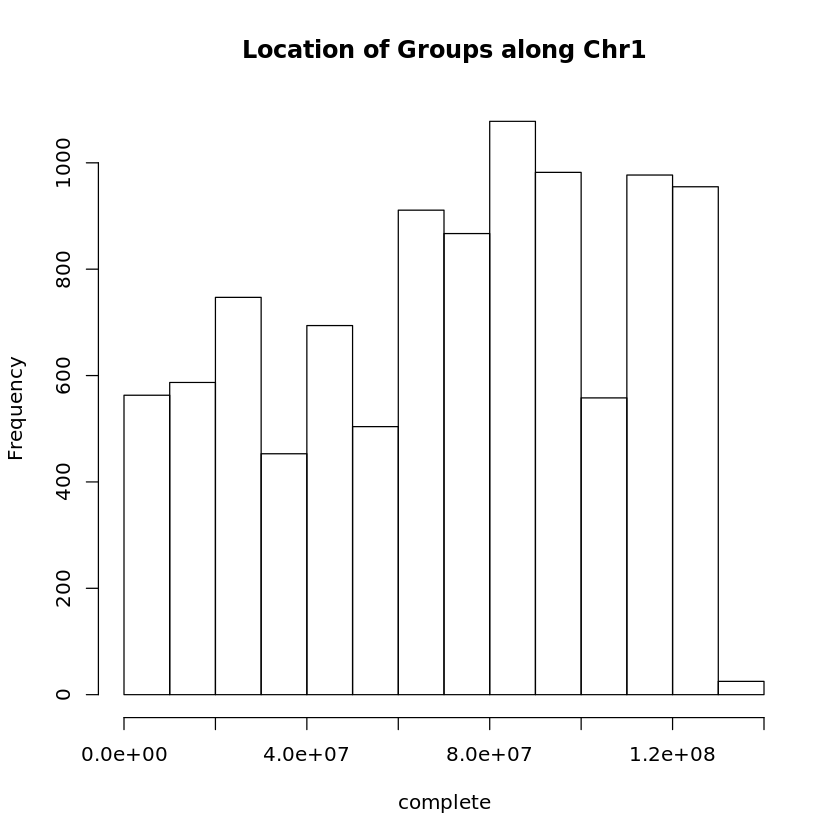

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
34717,chr10_3148300,3148200,185,54,13
34720,chr10_3148400,3148300,84,33,8
35082,chr10_3236400,3236300,125,28,4
35083,chr10_3236500,3236400,180,27,5
35110,chr10_3243400,3243300,15,15,7
35112,chr10_3243500,3243400,17,31,9
35240,chr10_3276200,3276100,88,6,0
35242,chr10_3276300,3276200,124,14,4
35439,chr10_3323100,3323000,85,27,2
35441,chr10_3323200,3323100,97,31,6


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 9901"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr10_3477300,3477200,83,0,0
110,gap 7,0,100,100,100
22,chr10_3540700,3540600,117,17,3
23,chr10_3540800,3540700,207,53,14
112,gap 8,0,100,100,100
25,chr10_3643700,3643600,214,30,0
26,chr10_3643800,3643700,155,23,0
113,gap 9,0,100,100,100
28,chr10_3645000,3644900,20,35,4
29,chr10_3645100,3645000,94,93,27


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
34717,chr10_3148300,3148200,185,54,13
2,chr10_3148400,3148300,84,33,8
1,gap 1,0,100,100,100
4,chr10_3236400,3236300,125,28,4
5,chr10_3236500,3236400,180,27,5
11,gap 2,0,100,100,100


,binID,start,high,medium,low
15346,gap 4696,0,100,100,100
145941,chr10_130565500,130565400,11,0,0
145951,chr10_130565600,130565500,18,0,0
15347,gap 4697,0,100,100,100
145971,chr10_130581900,130581800,10,1,0
145981,chr10_130582000,130581900,91,0,0


In [20]:
write.csv(part, "chr10_A_group.csv")

[1] "Total Number of groups: 4698"

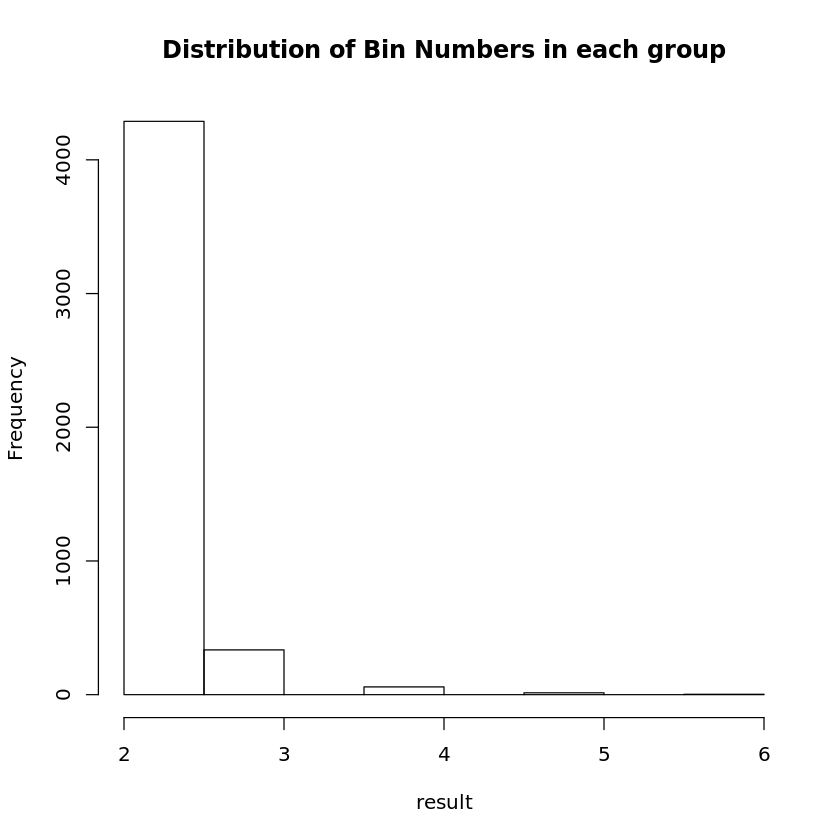

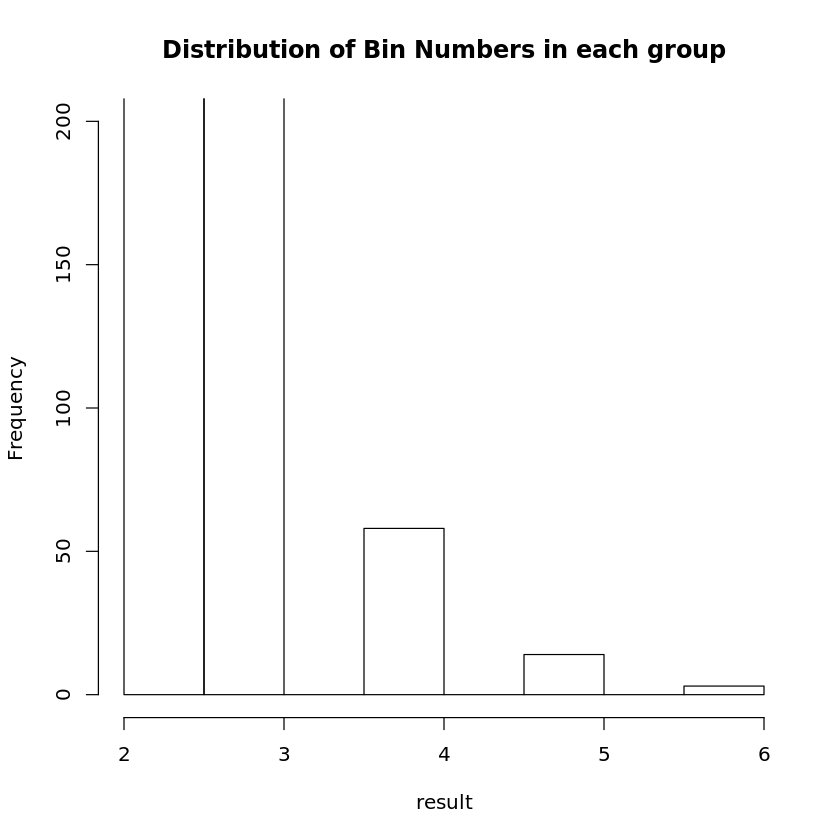

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")